In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
# YOUR CODE HERE
df = pd.read_excel('Energy Indicators.xls', header=None, footer=None)
Energy = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282], axis = 0)
Energy = Energy.drop([0,1], axis = 1)
Energy.columns = ['Country','Energy Supply', 'Energy Supply per Capita', '% Renewable']
Energy['Energy Supply'] = Energy['Energy Supply'].replace(['...'], np.nan)
Energy['Energy Supply per Capita'] = Energy['Energy Supply per Capita'].replace(['...'], np.nan)
Energy['% Renewable'] = Energy['% Renewable'].replace(['...'], np.nan)
Energy['Energy Supply'] = Energy['Energy Supply']*1000000
Energy['Country'] = Energy['Country'].replace(["Republic of Korea",
"United States of America20",
"United Kingdom of Great Britain and Northern Ireland19",
"China, Hong Kong Special Administrative Region3", 'Bolivia (Plurinational State of)', 'China2', 'China, Macao Special Administrative Region4', 'Denmark5', 'France6', 'Greenland7', 'Indonesia8', 'Italy9', 'Japan10', 'Kuwait11', 'Netherlands12', 'Portugal13', 'Saudi Arabia14', 'Serbia15', 'Spain16', 'Switzerland17', 'Ukraine18', 'Australia1', 'Iran (Islamic Republic of)'], ["South Korea",
"United States",
"United Kingdom",
"Hong Kong", 'Bolivia', 'China', 'China, Macao Special Administrative Region', 'Denmark', 'France', 'Greenland', 'Indonesia', 'Italy', 'Japan', 'Kuwait', 'Netherlands', 'Portugal', 'Saudi Arabia', 'Serbia', 'Spain', 'Switzerland', 'Ukraine', 'Australia', 'Iran'])
Energy['Country'] = [x.strip() for x in Energy['Country']]
Energy = Energy.set_index('Country')

GDP = pd.read_csv('world_bank.csv', header=None)
GDP = GDP.drop([0,1,2,3,4], axis = 0)
GDP.columns = ['Country','country code', 'indicator name', 'indicator code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
GDP['Country'] = GDP['Country'].replace(["Korea, Rep.", 
"Iran, Islamic Rep.",
"Hong Kong SAR, China"], ["South Korea", "Iran", "Hong Kong"])
#GDP = GDP[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',  '2014', '2015']]
GDP['Country'] = [x.strip() for x in GDP['Country']]
GDP = GDP.set_index('Country')

df = pd.read_excel('scimagojr-3.xlsx')
scimEn = df.drop([15,16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], axis = 0)
j = GDP.merge(Energy, on='Country', how='outer').merge(scimEn, on='Country', how='inner').set_index('Country')
j = j[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
j['PopEst'] = j['Energy Supply'] / j['Energy Supply per Capita']
#k = j.sort_values("PopEst", ascending=True)
k=j
k['Citable documents per Capita'] = k['Citable documents']/k['PopEst']
corr, pval = stats.pearsonr(k['Citable documents per Capita'], k['Energy Supply per Capita'])
p =j.reset_index()
def return_one(x):
    if x >= 17.02028:
        return 1
    else:
        return 0  
p['boolean'] = p['% Renewable'].apply(lambda x: return_one(x))
key = []
value = []
for c in p['Country']:
    key.append(c)
for v in p['boolean']:
    value.append(v)
pd.Series(value, index = key)

Australia             0
Brazil                1
Canada                1
China                 1
Germany               1
Spain                 1
France                1
United Kingdom        0
India                 0
Iran                  0
Italy                 1
Japan                 0
South Korea           0
Russian Federation    1
United States         0
dtype: int64

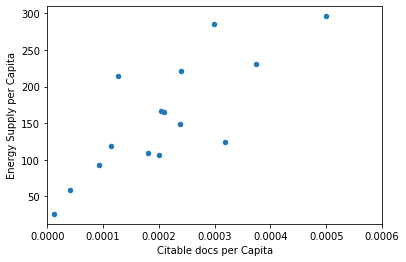

In [2]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = j
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plot9()

In [3]:
j['% Renewable'].median()

17.02028

In [4]:
#j = j.sort_values('Rank', ascending = True)
j['% Renewable']. median()

17.02028

In [5]:
def return_one(x):
    if x >= 17.02028:
        return 1
    else:
        return 0  

In [6]:
j=j.reset_index()
j

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2009,2010,2011,2012,2013,2014,2015,PopEst,Citable documents per Capita,Citable docs per Capita
0,Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,...,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12,2.331602e+07,0.000374,0.000374
1,Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,...,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,2.059153e+08,0.000042,0.000042
2,Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,...,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,3.523986e+07,0.000500,0.000500
3,China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09,0.000093,0.000093
4,Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,...,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,8.036970e+07,0.000209,0.000209
5,Spain,12,9428,9330,123336,23964,13.08,115,4.923000e+09,106.0,...,1.431475e+12,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12,4.644340e+07,0.000201,0.000201
6,France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,...,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,6.383735e+07,0.000203,0.000203
7,United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,...,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,6.387097e+07,0.000319,0.000319
8,India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,...,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.276731e+09,0.000012,0.000012
9,Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,...,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN,7.707563e+07,0.000114,0.000114


In [7]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [8]:
def get_state_region(x):
    Asia = ['China', 'Japan','India', 'Iran', 'South Korea']
    North_America = ['United States', 'Canada']
    europe = ['United Kingdom','Russian Federation','Germany','France','Italy','Spain']
    south = ['Brazil']
    aus = ['Australia']
    
    if x in Asia:
        return "Asia"
    elif x in europe:
        return "Europe"
    elif x in south:
        return "South America"
    elif x in aus:
        return 'Australia'
    else:
        return "North America"
j=j.reset_index()
j['Continent'] = j['Country'].apply(lambda x: get_state_region(x))
j

,index,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,...,2010,2011,2012,2013,2014,2015,PopEst,Citable documents per Capita,Citable docs per Capita,Continent
0,0,Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,...,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12,2.331602e+07,0.000374,0.000374,Australia
1,1,Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,...,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,2.059153e+08,0.000042,0.000042,South America
2,2,Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,...,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,3.523986e+07,0.000500,0.000500,North America
3,3,China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09,0.000093,0.000093,Asia
4,4,Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,...,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,8.036970e+07,0.000209,0.000209,Europe
5,5,Spain,12,9428,9330,123336,23964,13.08,115,4.923000e+09,...,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12,4.644340e+07,0.000201,0.000201,Europe
6,6,France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,...,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,6.383735e+07,0.000203,0.000203,Europe
7,7,United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,6.387097e+07,0.000319,0.000319,Europe
8,8,India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,...,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.276731e+09,0.000012,0.000012,Asia
9,9,Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,...,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN,7.707563e+07,0.000114,0.000114,Asia


In [9]:
intervals = [0,14,28,42,56,70]
j['bin'] = pd.cut(j['% Renewable'], intervals, labels = ['0-14','15-28','29-42','43-56','57-70'])
j.set_index(['Continent','bin'])

index             Country  Rank  Documents  \
Continent     bin                                                 
Australia     0-14       0           Australia    14       8831   
South America 57-70      1              Brazil    15       8668   
North America 57-70      2              Canada     6      17899   
Asia          15-28      3               China     1     127050   
Europe        15-28      4             Germany     7      17027   
              29-42      5               Spain    12       9428   
              15-28      6              France     9      13153   
              0-14       7      United Kingdom     4      20944   
Asia          15-28      8               India     8      15005   
              0-14       9                Iran    13       8896   
Europe        29-42     10               Italy    11      10964   
Asia          0-14      11               Japan     3      30504   
              0-14      12         South Korea    10      11983   
Europe        15-28     13  Russian Federation     5      18534   
North America 0-14      14       United States     2      96661   

                     Citable documents  Citations  Self-citations  \
Continent     bin                                                   
Australia     0-14                8725      90765           15606   
South America 57-70               8596      60702           14396   
North America 57-70              17620     215003           40930   
Asia          15-28             126767     597237          411683   
Europe        15-28              16831     140566           27426   
              29-42               9330     123336           23964   
              15-28              12973     130632           28601   
              0-14               20357     206091           37874   
Asia          15-28              14841     128763           37209   
              0-14                8819      57470           19125   
Europe        29-42              10794     111850           26661   
Asia          0-14               30287     223024           61554   
              0-14               11923     114675           22595   
Europe        15-28              18301      34266           12422   
North America 0-14               94747     792274          265436   

                     Citations per document  H index  Energy Supply  ...  \
Continent     bin                                                    ...   
Australia     0-14                    10.28      107   5.386000e+09  ...   
South America 57-70                    7.00       86   1.214900e+10  ...   
North America 57-70                   12.01      149   1.043100e+10  ...   
Asia          15-28                    4.70      138   1.271910e+11  ...   
Europe        15-28                    8.26      126   1.326100e+10  ...   
              29-42                   13.08      115   4.923000e+09  ...   
              15-28                    9.93      114   1.059700e+10  ...   
              0-14                     9.84      139   7.920000e+09  ...   
Asia          15-28                    8.58      115   3.319500e+10  ...   
              0-14                     6.46       72   9.172000e+09  ...   
Europe        29-42                   10.20      106   6.530000e+09  ...   
Asia          0-14                     7.31      134   1.898400e+10  ...   
              0-14                     9.57      104   1.100700e+10  ...   
Europe        15-28                    1.85       57   3.070900e+10  ...   
North America 0-14                     8.20      230   9.083800e+10  ...   

                             2009          2010          2011          2012  \
Continent     bin                                                             
Australia     0-14   1.119654e+12  1.142251e+12  1.169431e+12  1.211913e+12   
South America 57-70  2.054215e+12  2.208872e+12  2.295245e+12  2.339209e+12   
North America 57-70  1.565145e+12  1.613406e+12  1.664087e+12  1.693133e+12   
Asia          15-28

In [29]:
df = pd.read_excel('Energy Indicators.xls', header=None, footer=None)
Energy = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282], axis = 0)
Energy = Energy.drop([0,1], axis = 1)
Energy.columns = ['Country','Energy Supply', 'Energy Supply per Capita', '% Renewable']
Energy['Energy Supply'] = Energy['Energy Supply'].replace(['...'], np.nan)
Energy['Energy Supply per Capita'] = Energy['Energy Supply per Capita'].replace(['...'], np.nan)
Energy['% Renewable'] = Energy['% Renewable'].replace(['...'], np.nan)
Energy['Energy Supply'] = Energy['Energy Supply']*1000000
Energy['Country'] = Energy['Country'].replace(["Republic of Korea",
"United States of America20",
"United Kingdom of Great Britain and Northern Ireland19",
"China, Hong Kong Special Administrative Region3", 'Bolivia (Plurinational State of)', 'China2', 'China, Macao Special Administrative Region4', 'Denmark5', 'France6', 'Greenland7', 'Indonesia8', 'Italy9', 'Japan10', 'Kuwait11', 'Netherlands12', 'Portugal13', 'Saudi Arabia14', 'Serbia15', 'Spain16', 'Switzerland17', 'Ukraine18', 'Australia1', 'Iran (Islamic Republic of)'], ["South Korea",
"United States",
"United Kingdom",
"Hong Kong", 'Bolivia', 'China', 'China, Macao Special Administrative Region', 'Denmark', 'France', 'Greenland', 'Indonesia', 'Italy', 'Japan', 'Kuwait', 'Netherlands', 'Portugal', 'Saudi Arabia', 'Serbia', 'Spain', 'Switzerland', 'Ukraine', 'Australia', 'Iran'])
Energy['Country'] = [x.strip() for x in Energy['Country']]
Energy = Energy.set_index('Country')

GDP = pd.read_csv('world_bank.csv', header=None)
GDP = GDP.drop([0,1,2,3,4], axis = 0)
GDP.columns = ['Country','country code', 'indicator name', 'indicator code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
GDP['Country'] = GDP['Country'].replace(["Korea, Rep.", 
"Iran, Islamic Rep.",
"Hong Kong SAR, China"], ["South Korea", "Iran", "Hong Kong"])
#GDP = GDP[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',  '2014', '2015']]
GDP['Country'] = [x.strip() for x in GDP['Country']]
GDP = GDP.set_index('Country')

df = pd.read_excel('scimagojr-3.xlsx')
scimEn = df.drop([15,16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], axis = 0)
j = GDP.merge(Energy, on='Country', how='outer').merge(scimEn, on='Country', how='inner').set_index('Country')
j = j[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
j['PopEst'] = j['Energy Supply'] / j['Energy Supply per Capita']
def number(num):
    return ('{:,}'.format(num))
j['PopEstr'] = j['PopEst'].apply(lambda x: number(x))
y = j.reset_index()
b = pd.Series(list(j['PopEstr']), index = y['Country'])
b

Country
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Canada                  35,239,864.86486486
China                 1,367,645,161.2903225
Germany                 80,369,696.96969697
Spain                    46,443,396.2264151
France                  63,837,349.39759036
United Kingdom         63,870,967.741935484
India                 1,276,730,769.2307692
Iran                    77,075,630.25210084
Italy                  59,908,256.880733944
Japan                  127,409,395.97315437
South Korea            49,805,429.864253394
Russian Federation            143,500,000.0
United States          317,615,384.61538464
dtype: object

In [20]:
j['PopEstr']

0      23,316,017.316017315
1      205,915,254.23728815
2       35,239,864.86486486
3     1,367,645,161.2903225
4       80,369,696.96969697
5        46,443,396.2264151
6       63,837,349.39759036
7      63,870,967.741935484
8     1,276,730,769.2307692
9       77,075,630.25210084
10     59,908,256.880733944
11     127,409,395.97315437
12     49,805,429.864253394
13            143,500,000.0
14     317,615,384.61538464
Name: PopEstr, dtype: object